# **MINOR PROJECT** 




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import csv

# 1.1 CLEANING OF DATA

In [ ]:
df = pd.read_excel('./Document1.xlsx',header=9)
#reading in the excel sheet and setting header as sheet had unnecessary headings
df.head()

,SALEDATE,Unnamed: 1,Unnamed: 2,BILLNO,Unnamed: 4,CUSTOMERNAME,CUSTOMERMOBILE,CUSTOMERGSTIN,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,SALESPERSON,HSNSACCODE,CAT1,CAT2,ITEMDISCOUNTAMT,CAT4,DEPARTMENT,SALEQTY
0,2022-10-01 00:00:00,NaN,NaN,PM/00003,NaN,SIDDHARTH MADAN,8.220099e+09,NaN,NaN,NaN,...,NaN,NaN,SUNIL RAVIDAS,621139.0,CPOSK606,316-B. GREEN,0.0,XL,Kurta Set -09-CELEBRATION,1
1,2022-10-02 00:00:00,NaN,NaN,PM/00004,NaN,GAGAN VAISHNAW,8.109558e+09,NaN,NaN,NaN,...,NaN,NaN,AZAD RAJPUT,611780.0,B200104,304-FAWN,0.0,2.75 m,Bandanna 09-LR,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,621139.0,CPOSK433,333,0.0,S,Kurta Set -09-CELEBRATION,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S952095,311-PISTA,0.0,XL,Kurta Set -09-CELEBRATION,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SDES624,319-GAJAREE,0.0,M,Kurta Set -09-CHIKANKARI,1


In [ ]:
#dropping blank and unnecessary columns
drop_list = ['Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 8','Unnamed: 9','Unnamed: 13','Unnamed: 14','Unnamed: 10','Unnamed: 12', 
             'ITEMDISCOUNTAMT' , 'CUSTOMERGSTIN']
df.drop(drop_list, axis=1, inplace=True)
df.head()

,SALEDATE,BILLNO,CUSTOMERNAME,CUSTOMERMOBILE,GSTDOCNO,SALESPERSON,HSNSACCODE,CAT1,CAT2,CAT4,DEPARTMENT,SALEQTY
0,2022-10-01 00:00:00,PM/00003,SIDDHARTH MADAN,8.220099e+09,L47P2223-0000003,SUNIL RAVIDAS,621139.0,CPOSK606,316-B. GREEN,XL,Kurta Set -09-CELEBRATION,1
1,2022-10-02 00:00:00,PM/00004,GAGAN VAISHNAW,8.109558e+09,L47P2223-0000004,AZAD RAJPUT,611780.0,B200104,304-FAWN,2.75 m,Bandanna 09-LR,1
2,NaN,NaN,NaN,NaN,NaN,NaN,621139.0,CPOSK433,333,S,Kurta Set -09-CELEBRATION,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S952095,311-PISTA,XL,Kurta Set -09-CELEBRATION,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SDES624,319-GAJAREE,M,Kurta Set -09-CHIKANKARI,1


In [ ]:
# Dropping the last row which contains summary
df.drop(df.tail(1).index, axis=0, inplace=True)
df.tail()

,SALEDATE,BILLNO,CUSTOMERNAME,CUSTOMERMOBILE,GSTDOCNO,SALESPERSON,HSNSACCODE,CAT1,CAT2,CAT4,DEPARTMENT,SALEQTY
483,NaN,NaN,NaN,NaN,NaN,NaN,621139.0,CPOSK452,307-MAROON,XL,Kurta Set -09-CHIKANKARI,1
484,2023-02-24 00:00:00,PM/00226,PUJA AGARWAL,9.424916e+09,L47P2223-0000226,sukhlal patel,481940.0,"CARRY BAG PAPER-GOLDEN 38""*11""*29""",140GSM KRAFT PAPER,NaN,PACKING ACCESSORIES-09,1
485,NaN,NaN,NaN,NaN,NaN,NaN,611780.0,BDDES18,304-FAWN,2.75 m,Bandanna 09-LR,1
486,NaN,PM/00227,AMAN CHOUHAN,7.649839e+09,L47P2223-0000227,AZAD RAJPUT,481940.0,"CARRY BAG PAPER SAFA 12""*11""*11.5""","140 GSM BROWN KRAFT PAPER,TOP & BOTTOM CARD 25...",NaN,PACKING ACCESSORIES-09,1
487,NaN,NaN,NaN,NaN,NaN,NaN,650500.0,MSAFA146,325-RANI,NaN,Safa-14,1


In [ ]:
# Merging cells with common data 
df.apply(lambda x: df.fillna(method='ffill', inplace=True))
df.head()

,SALEDATE,BILLNO,CUSTOMERNAME,CUSTOMERMOBILE,GSTDOCNO,SALESPERSON,HSNSACCODE,CAT1,CAT2,CAT4,DEPARTMENT,SALEQTY
0,2022-10-01,PM/00003,SIDDHARTH MADAN,8.220099e+09,L47P2223-0000003,SUNIL RAVIDAS,621139.0,CPOSK606,316-B. GREEN,XL,Kurta Set -09-CELEBRATION,1
1,2022-10-02,PM/00004,GAGAN VAISHNAW,8.109558e+09,L47P2223-0000004,AZAD RAJPUT,611780.0,B200104,304-FAWN,2.75 m,Bandanna 09-LR,1
2,2022-10-02,PM/00004,GAGAN VAISHNAW,8.109558e+09,L47P2223-0000004,AZAD RAJPUT,621139.0,CPOSK433,333,S,Kurta Set -09-CELEBRATION,1
3,2022-10-02,PM/00004,GAGAN VAISHNAW,8.109558e+09,L47P2223-0000004,AZAD RAJPUT,621139.0,S952095,311-PISTA,XL,Kurta Set -09-CELEBRATION,1
4,2022-10-02,PM/00004,GAGAN VAISHNAW,8.109558e+09,L47P2223-0000004,AZAD RAJPUT,621139.0,SDES624,319-GAJAREE,M,Kurta Set -09-CHIKANKARI,1


In [ ]:
#Changing data types to appropriate ones
type_dict = {'BILLNO': 'string', 'CUSTOMERNAME': 'string', 'SALESPERSON': 'string',
             'CAT1': 'string', 'DEPARTMENT': 'string', 'CAT2': 'string', 'SALEQTY': 'int32', 'CAT4': 'string' }
df = df.astype(type_dict)
df.drop(['CUSTOMERMOBILE','GSTDOCNO','HSNSACCODE', 'CAT1'], axis=1, inplace=True)
df.dtypes

SALEDATE        datetime64[ns]
BILLNO                  string
CUSTOMERNAME            string
SALESPERSON             string
CAT2                    string
CAT4                    string
DEPARTMENT              string
SALEQTY                  int32
dtype: object

In [ ]:
# Changing string columns into uppercase wherever required
df['CUSTOMERNAME'] = df['CUSTOMERNAME'].str.upper()
df['SALESPERSON'] = df['SALESPERSON'].str.upper()
df['DEPARTMENT'] = df['DEPARTMENT'].str.upper()

In [ ]:
# Converting the SALEDATE type to datetime
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

#ADDING A MONTH & WEEK NUMBER COLUMN
df['MONTH'] = df["SALEDATE"].dt.month_name()
df['WEEKNO'] = df["SALEDATE"].dt.isocalendar().week
df['WEEKNO'] = (df['WEEKNO'] % 38) 
for i in range(335,488):
  df['WEEKNO'].iloc[i] += 14

In [ ]:
df.head()

,SALEDATE,BILLNO,CUSTOMERNAME,SALESPERSON,CAT2,CAT4,DEPARTMENT,SALEQTY,MONTH,WEEKNO
0,2022-10-01,PM/00003,SIDDHARTH MADAN,SUNIL RAVIDAS,316-B. GREEN,XL,KURTA SET -09-CELEBRATION,1,October,1
1,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,304-FAWN,2.75 m,BANDANNA 09-LR,1,October,1
2,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,333,S,KURTA SET -09-CELEBRATION,1,October,1
3,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,311-PISTA,XL,KURTA SET -09-CELEBRATION,1,October,1
4,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,319-GAJAREE,M,KURTA SET -09-CHIKANKARI,1,October,1


# 1.2 VISUALISATION

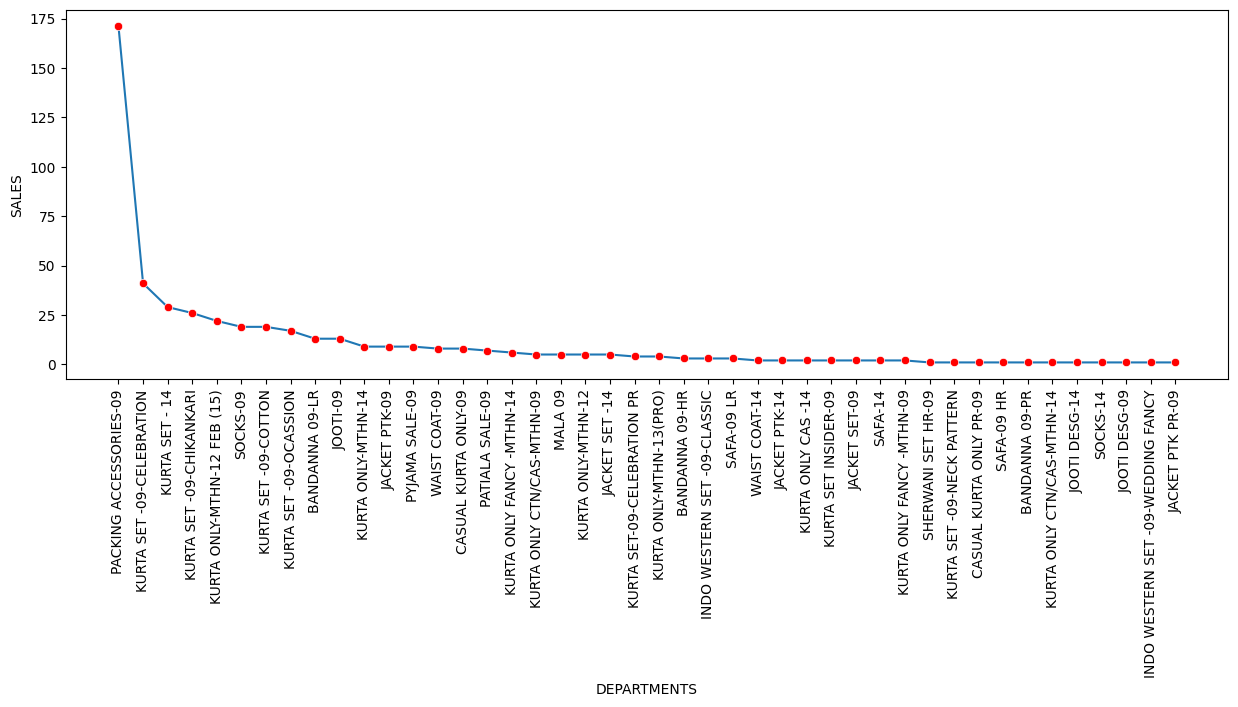

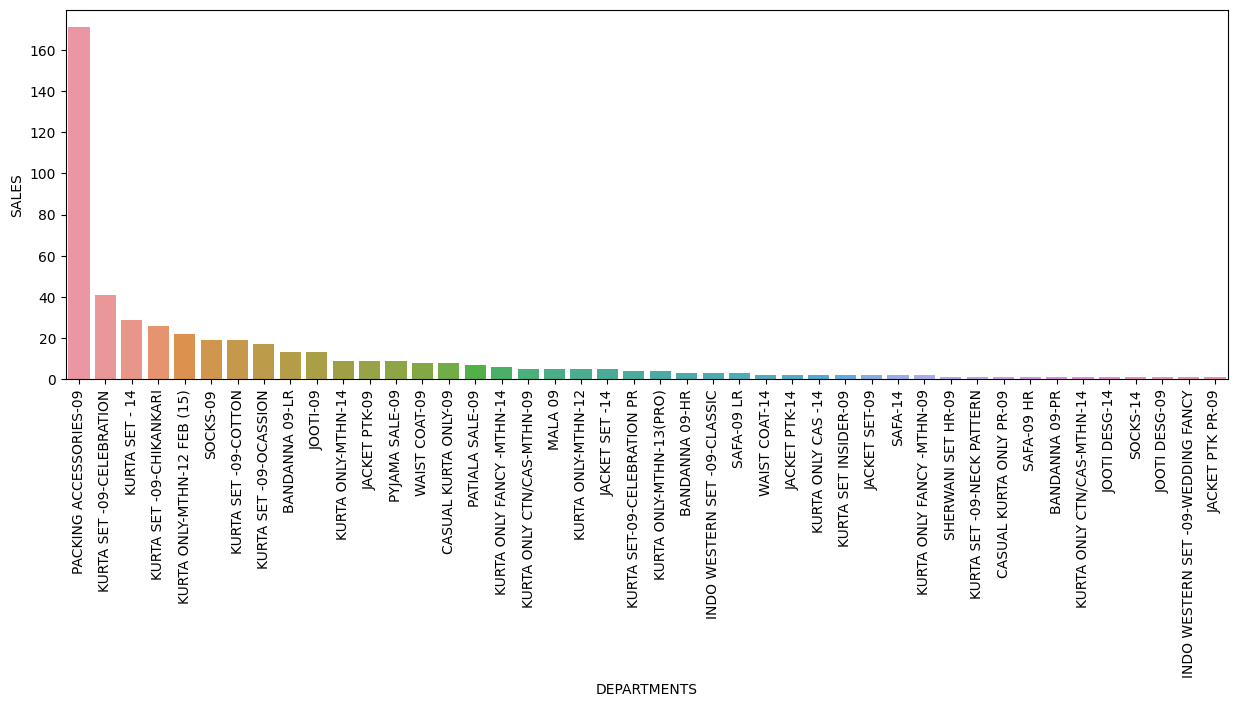

In [ ]:
# Sales grouped by departments (categories)

depart_sales = df['DEPARTMENT'].value_counts()

plt.figure().set_figwidth(15)
sns.lineplot(x=depart_sales.index, y=depart_sales.values, zorder=1)
sns.scatterplot( x=depart_sales.index, y=depart_sales.values, color='red', zorder=2)
plt.xticks(rotation=90)

plt.xlabel("DEPARTMENTS")
plt.ylabel("SALES")

plt.show()

print('\n\n')

plt.figure().set_figwidth(15)
sns.barplot( x=depart_sales.index, y=depart_sales.values)
plt.xticks(rotation=90)


plt.xlabel("DEPARTMENTS")
plt.ylabel("SALES")

plt.show()

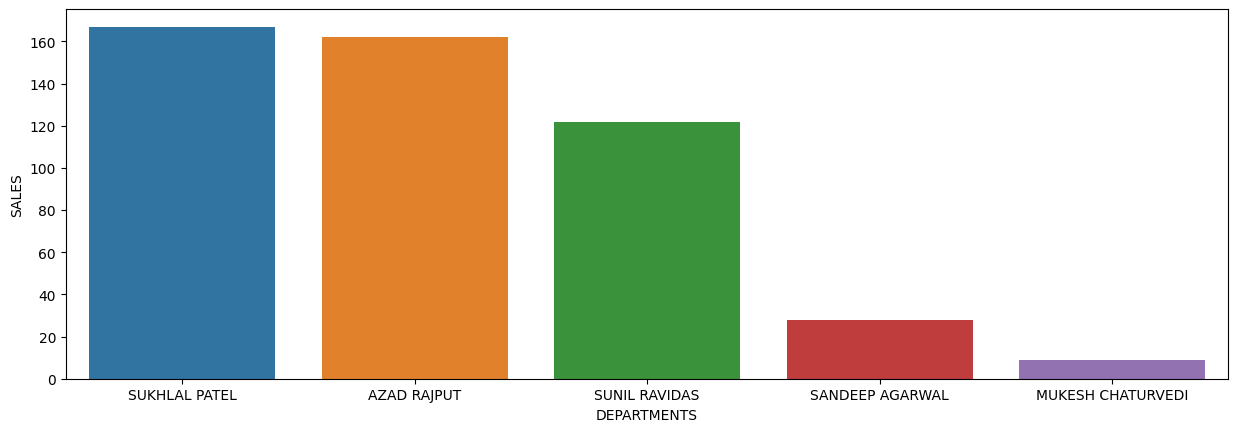

In [ ]:
# Sales grouped by SALESPERSON

sale_person_dict = df['SALESPERSON'].value_counts()

plt.figure().set_figwidth(15)
sns.barplot( x=sale_person_dict.index, y=sale_person_dict.values)


plt.xlabel("DEPARTMENTS")
plt.ylabel("SALES")

plt.show()

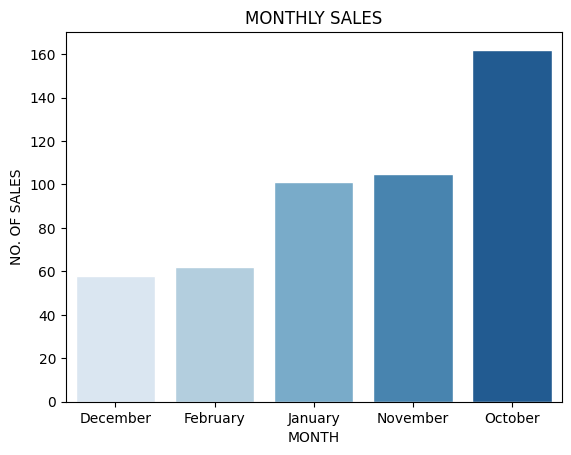

In [ ]:
#MONTHLY SALES
sale_month = df.groupby('MONTH')['MONTH'].count()
plt.ylabel('NO. OF SALES')
plt.title("MONTHLY SALES")
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r", len(sale_month))
rank = sale_month.argsort().argsort()
sns.barplot(x=sale_month.index, y=sale_month.values, palette=np.array(pal[::-1])[rank])
plt.show()

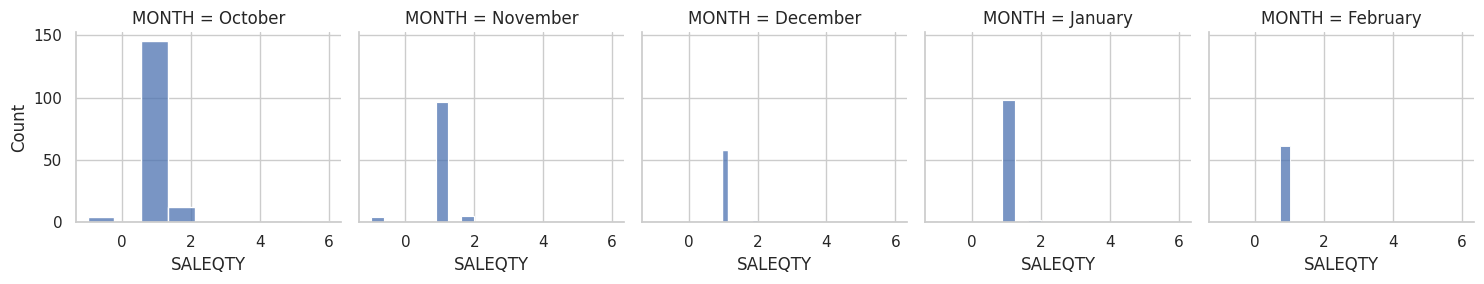

In [ ]:
g = sns.FacetGrid(df, col='MONTH');
g.map(sns.histplot, 'SALEQTY');
plt.show()

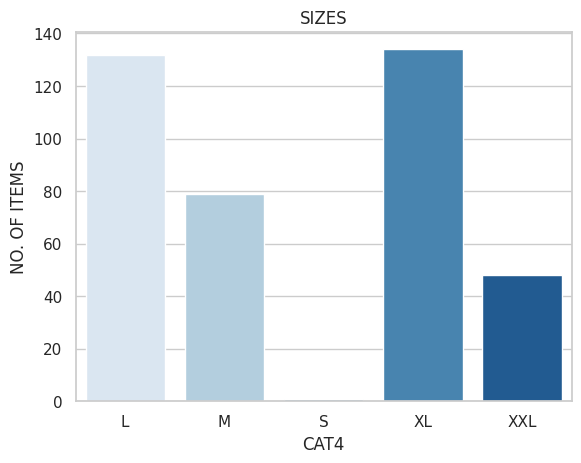

In [ ]:
#SIZE DISTRUBUTION

lst = ['XL', 'M', 'S', 'L', 'XXL']
df_ = df[df['CAT4'].isin(lst)]
sizes = df_.groupby('CAT4')['CAT4'].count()

plt.ylabel('NO. OF ITEMS')
plt.title("SIZES")
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r", len(sale_month))
rank = sale_month.argsort().argsort()
sns.barplot(x=sizes.index, y=sizes.values, palette=np.array(pal[::-1])[rank])
plt.show()

<Axes: xlabel='MONTH'>

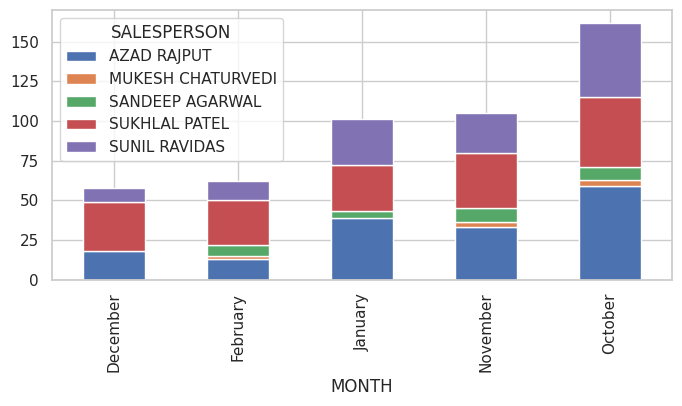

In [ ]:
#MONTHLY SALES DISTRIBUTION BY SALESMAN

df.groupby(['MONTH', 'SALESPERSON']).size().unstack().plot(kind='bar', stacked=True, figsize=(8,3.5))

<Axes: xlabel='MONTH'>

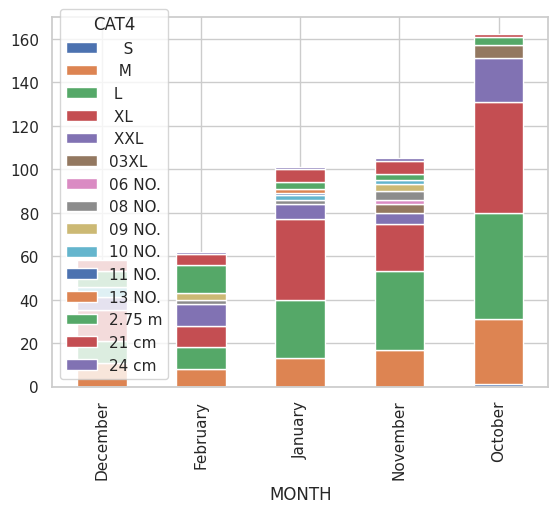

In [ ]:
#SALES DISTRIBUTION AS PER SIZES

df.groupby(['MONTH', 'CAT4']).size().unstack().plot(kind='bar', stacked=True)

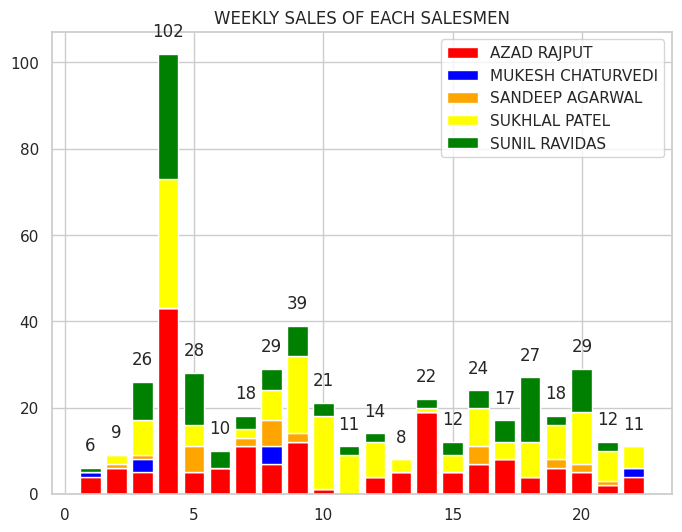

In [ ]:
#WEEKLY SALES OF SALESPERSON

weekly_sales = df.groupby(['WEEKNO', 'SALESPERSON'])['SALEQTY'].sum().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(8,6))

colors = ['red', 'blue', 'orange', 'yellow', 'green']
# colors = plt.cm.Blues(np.linspace(0.3, 0.9, 5))
bottom = np.zeros(len(weekly_sales))

for i, col in enumerate(weekly_sales.columns):
  ax.bar(
      weekly_sales.index, weekly_sales[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(weekly_sales[col])

# Sum up the rows of our data to get the total value of each bar.
totals = weekly_sales.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 4
# Add labels to each bar.
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center')

ax.set_title('WEEKLY SALES OF EACH SALESMEN')
ax.legend()

In [ ]:
#grouping of data
df_ = df.copy(deep=True)
df_.drop(['MONTH', 'CUSTOMERNAME', 'SALEDATE', 'DEPARTMENT',  'CAT2', 'CAT4'], axis=1, inplace=True)
df_.drop('BILLNO', axis=1, inplace=True)
df_.index = np.arange(488)
df_ = df_.groupby(['WEEKNO', 'SALESPERSON']).count()
df_.head()

SALEQTY
WEEKNO SALESPERSON               
1      AZAD RAJPUT              4
       MUKESH CHATURVEDI        1
       SUNIL RAVIDAS            1
2      AZAD RAJPUT              6
       SANDEEP AGARWAL          1

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


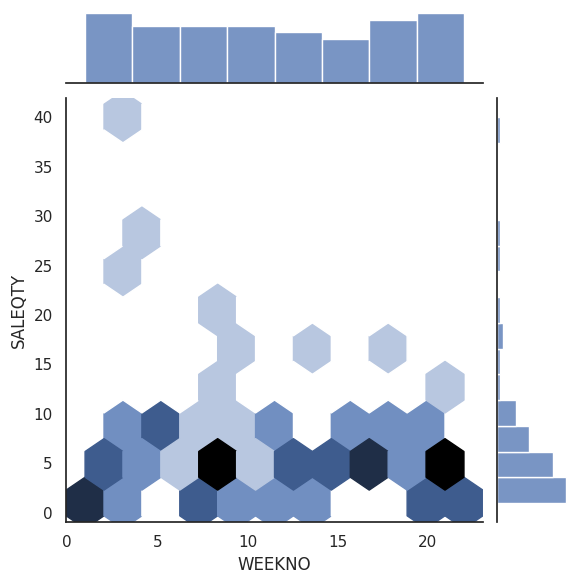

In [ ]:
# sales per week
with sns.axes_style('white'):
    sns.jointplot(x="WEEKNO", y="SALEQTY", data=df_, kind='hex')

TypeError: ignored

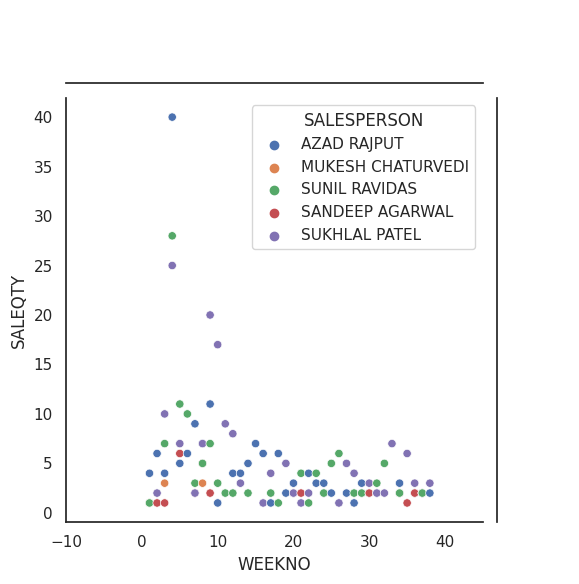

In [ ]:
#sales per week with hue of sales man

temp_dict = {'SALEQTY' : "float"}
df_ = df_.astype(temp_dict)
with sns.axes_style('white'):
    sns.jointplot(x= "WEEKNO",y ="SALEQTY", data=df_, kind='scatter', hue='SALESPERSON', xlim = (-10,45))

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


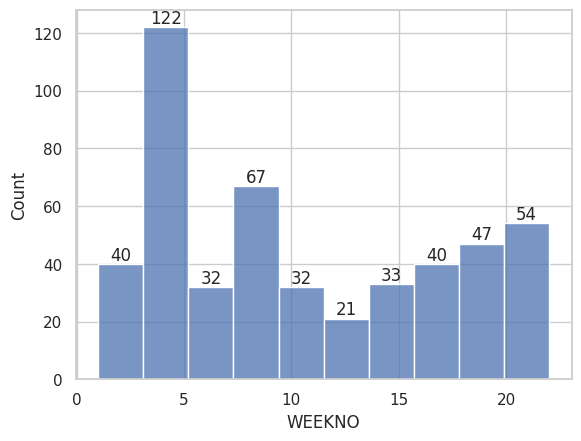

In [ ]:
#WEEKLY SALES
ax = sns.histplot(x='WEEKNO', data=df)
# ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)

**KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 

In [ ]:
customers_df = pd.DataFrame(df['CUSTOMERNAME'].value_counts())
customers_df.columns = ['Purchase Qty']
customers_df['id'] = np.arange(1, customers_df.shape[0]+1, 1)
customers_df['name'] = customers_df.index
customers_df.index = np.arange(0, customers_df.shape[0])

customers_df

In [ ]:
X1 = customers_df[['Purchase Qty']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:

SK = range(2,11)
sil_score = []
for i in SK:
    labels= KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X1).labels_
    score = metrics.silhouette_score(X1,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X1,labels,metric="euclidean",sample_size=1000,random_state=200)))
    
plt.plot(np.arange(2, 11, 1), sil_score)
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
print(centroids1)
print(labels1)

In [ ]:
h = 0.02
y_min, y_max = X1.iloc[:, 0].min() - 1, X1.iloc[:, 0].max() + 1
x_min, x_max = 0, X1.shape[0]+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = np.arange(1, X1.shape[0]+1) ,y = 'Purchase Qty', data=X1, c = labels1, s = 12 )

plt.ylabel('Purchase Quantity') , plt.xlabel('Customers')
plt.show()

## Adding TOPWEAR and BOTTOMWEAR columns ##

In [ ]:
df.DEPARTMENT.unique()

<StringArray>
[         'KURTA SET -09-CELEBRATION',                     'BANDANNA 09-LR',
           'KURTA SET -09-CHIKANKARI',                 'KURTA ONLY-MTHN-14',
               'CASUAL KURTA ONLY-09',                            'MALA 09',
                           'SOCKS-09',                     'BANDANNA 09-HR',
                            'SAFA-14',         'KURTA ONLY CTN/CAS-MTHN-09',
        'KURTA SET-09-CELEBRATION PR',        'KURTA ONLY-MTHN-12 FEB (15)',
                     'PYJAMA SALE-09',               'KURTA SET -09-COTTON',
                     'KURTA SET - 14', 'INDO WESTERN SET -09-WEDDING FANCY',
             'PACKING ACCESSORIES-09',             'KURTA SET -09-OCASSION',
            'CASUAL KURTA ONLY PR-09',               'KURTA SET INSIDER-09',
                      'WAIST COAT-14',                      'JACKET PTK-09',
            'KURTA ONLY-MTHN-13(PRO)',                 'KURTA ONLY-MTHN-12',
          'KURTA ONLY FANCY -MTHN-09',          'KURTA ONLY FA

In [ ]:
topwear = ['KURTA', 'SAFA', 'COAT', 'BANDANNA', 'JACKET', 'MALA', 'SHERWANI']
bottomwear = ['SOCKS', 'PYJAMA', 'PATIALA', 'JOOTI']

In [ ]:
def fuc(depart, lst) :
  depart = depart.replace('-', ' ').split(' ')
  for i in depart :
    if i in lst : 
      return True
  else :
    return False

In [ ]:
df['TOPWEAR'] = df['DEPARTMENT'].apply(lambda x: fuc(x, topwear))
df['BOTTOMWEAR'] = df['DEPARTMENT'].apply(lambda x: fuc(x, bottomwear))

In [ ]:
df.head(10)

,SALEDATE,BILLNO,CUSTOMERNAME,SALESPERSON,CAT2,CAT4,DEPARTMENT,SALEQTY,MONTH,WEEKNO,TOPWEAR,BOTTOMWEAR
0,2022-10-01,PM/00003,SIDDHARTH MADAN,SUNIL RAVIDAS,316-B. GREEN,XL,KURTA SET -09-CELEBRATION,1,October,1,True,False
1,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,304-FAWN,2.75 m,BANDANNA 09-LR,1,October,1,True,False
2,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,333,S,KURTA SET -09-CELEBRATION,1,October,1,True,False
3,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,311-PISTA,XL,KURTA SET -09-CELEBRATION,1,October,1,True,False
4,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,319-GAJAREE,M,KURTA SET -09-CHIKANKARI,1,October,1,True,False
5,2022-10-02,PM/00005,NEHA NEHA,MUKESH CHATURVEDI,327-L. GREEN,L,KURTA ONLY-MTHN-14,1,October,1,True,False
6,2022-10-04,PM/00006,SUJAL BHATIYA,SANDEEP AGARWAL,324-F. YELLOW,XL,CASUAL KURTA ONLY-09,1,October,2,True,False
7,2022-10-06,PM/00007,JASVINDER SINGH,SUKHLAL PATEL,303-BISCUIT,XXL,KURTA SET -09-CELEBRATION,1,October,2,True,False
8,2022-10-06,PM/00008,DEEPANSHU GUPTA,SUKHLAL PATEL,307-MAROON,XXL,MALA 09,1,October,2,True,False
9,2022-10-07,PM/00009,NIHAR JAIN,AZAD RAJPUT,302-CREAM,21 cm,SOCKS-09,1,October,2,False,True


##**KMode Clustering**##

In [ ]:
# First we will keep a copy of data
df_copy = df.copy()

In [ ]:
df_copy.drop(['BILLNO', 'SALEDATE', 'SALEQTY', 'WEEKNO'], axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_copy = df_copy.apply(le.fit_transform)
df_copy.head()

In [ ]:
pip install kmodes

In [ ]:
# Importing Libraries

from kmodes.kmodes import KModes

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_copy)

In [ ]:
# Predicted Clusters
fitClusters_cao

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_copy.columns

In [ ]:
# Mode of the clusters
clusterCentroidsDf

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_copy)

In [ ]:
# Predicted clusters
fitClusters_huang

In [ ]:
# Choosing K by comparing Cost against each K

cost = []
for num_clusters in list(range(1,9)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_copy)
    cost.append(kmode.cost_)

In [ ]:
y = np.array([i for i in range(1,9,1)])
plt.plot(y,cost)

In [ ]:
from sklearn import metrics 
SK = range(2,9,1)
sil_score = []
for i in SK:
    labels= KModes(n_clusters=i,init="Cao",n_init = 1, verbose=1,random_state=200).fit(df_copy).labels_
    score = metrics.silhouette_score(df_copy,labels,metric='hamming',sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_copy,labels,metric='hamming',sample_size=1000,random_state=200)))

In [ ]:
plt.plot(np.arange(2, 9, 1), sil_score)
plt.show()

In [ ]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_copy)

In [ ]:
fitClusters_cao

In [ ]:
# Combining the predicted clusters with the original DF.

df_ = df_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

In [ ]:
# Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [ ]:
cluster_0.info()

In [ ]:
cluster_1.info()

In [ ]:
plt.subplots(figsize = (35,10))
sns.countplot(x=combinedDf['CUSTOMERNAME'],order=combinedDf['CUSTOMERNAME'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=combinedDf['SALESPERSON'],order=combinedDf['SALESPERSON'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Apriori

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=8bd055141371f2f574caa1305d24200d51ed02f77e5ce341c27421b0298724fe
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [ ]:
df_copy_1 = df.copy()
df_copy_1.head()

,SALEDATE,BILLNO,CUSTOMERNAME,SALESPERSON,CAT2,CAT4,DEPARTMENT,SALEQTY,MONTH,WEEKNO
0,2022-10-01,PM/00003,SIDDHARTH MADAN,SUNIL RAVIDAS,316-B. GREEN,XL,KURTA SET -09-CELEBRATION,1,October,1
1,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,304-FAWN,2.75 m,BANDANNA 09-LR,1,October,1
2,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,333,S,KURTA SET -09-CELEBRATION,1,October,1
3,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,311-PISTA,XL,KURTA SET -09-CELEBRATION,1,October,1
4,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,319-GAJAREE,M,KURTA SET -09-CHIKANKARI,1,October,1


In [ ]:
df_copy_1.DEPARTMENT.unique()

<StringArray>
[         'KURTA SET -09-CELEBRATION',                     'BANDANNA 09-LR',
           'KURTA SET -09-CHIKANKARI',                 'KURTA ONLY-MTHN-14',
               'CASUAL KURTA ONLY-09',                            'MALA 09',
                           'SOCKS-09',                     'BANDANNA 09-HR',
                            'SAFA-14',         'KURTA ONLY CTN/CAS-MTHN-09',
        'KURTA SET-09-CELEBRATION PR',        'KURTA ONLY-MTHN-12 FEB (15)',
                     'PYJAMA SALE-09',               'KURTA SET -09-COTTON',
                     'KURTA SET - 14', 'INDO WESTERN SET -09-WEDDING FANCY',
             'PACKING ACCESSORIES-09',             'KURTA SET -09-OCASSION',
            'CASUAL KURTA ONLY PR-09',               'KURTA SET INSIDER-09',
                      'WAIST COAT-14',                      'JACKET PTK-09',
            'KURTA ONLY-MTHN-13(PRO)',                 'KURTA ONLY-MTHN-12',
          'KURTA ONLY FANCY -MTHN-09',          'KURTA ONLY FA

In [ ]:
unique_depart = ['KURTA', 'SOCKS', 'SAFA', 'PYJAMA', 'COAT', 'PATIALA', 'JACKET', 'JOOTI', 'BANDANNA', 'MALA', 'INDO WESTERN', 'SHERWANI', 'PACKING ACCESSORIES']

In [ ]:
def fun(depart, lst) :
  for i in lst: 
    if i in depart :
      return i
  return 'NEW_ITEM'
    

In [ ]:
df_copy_1['DEPARTMENT'] = df_copy_1.DEPARTMENT.apply(lambda x: fun(x, unique_depart))

In [ ]:
df_copy_1.head(20)

,SALEDATE,BILLNO,CUSTOMERNAME,SALESPERSON,CAT2,CAT4,DEPARTMENT,SALEQTY,MONTH,WEEKNO
0,2022-10-01,PM/00003,SIDDHARTH MADAN,SUNIL RAVIDAS,316-B. GREEN,XL,KURTA,1,October,1
1,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,304-FAWN,2.75 m,BANDANNA,1,October,1
2,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,333,S,KURTA,1,October,1
3,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,311-PISTA,XL,KURTA,1,October,1
4,2022-10-02,PM/00004,GAGAN VAISHNAW,AZAD RAJPUT,319-GAJAREE,M,KURTA,1,October,1
5,2022-10-02,PM/00005,NEHA NEHA,MUKESH CHATURVEDI,327-L. GREEN,L,KURTA,1,October,1
6,2022-10-04,PM/00006,SUJAL BHATIYA,SANDEEP AGARWAL,324-F. YELLOW,XL,KURTA,1,October,2
7,2022-10-06,PM/00007,JASVINDER SINGH,SUKHLAL PATEL,303-BISCUIT,XXL,KURTA,1,October,2
8,2022-10-06,PM/00008,DEEPANSHU GUPTA,SUKHLAL PATEL,307-MAROON,XXL,MALA,1,October,2
9,2022-10-07,PM/00009,NIHAR JAIN,AZAD RAJPUT,302-CREAM,21 cm,SOCKS,1,October,2


In [ ]:
transactions = dict()

for i, j in df_copy_1.iterrows():
  if transactions.get(j['BILLNO']) == None :
    transactions[j['BILLNO']] = {j['DEPARTMENT']}
  else :
    transactions[j['BILLNO']].add(j['DEPARTMENT'])

temp = []
for i in transactions.values() :
  temp.append(list(i))
transactions = temp

In [ ]:
transactions[:10]

[['KURTA'],
 ['BANDANNA', 'KURTA'],
 ['KURTA'],
 ['KURTA'],
 ['KURTA'],
 ['MALA'],
 ['SOCKS'],
 ['KURTA'],
 ['BANDANNA', 'SAFA', 'MALA'],
 ['KURTA']]

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 5)
results = list(rules)

In [ ]:
def inspect(results):
    lhs         =[tuple(result[2][0][0]) for result in results]
    rhs         =[tuple(result[2][0][1]) for result in results]
    supports    =[result[1] for result in results]
    confidences =[result[2][0][2] for result in results]
    lifts        =[result[2][0][3] for result in results]
    return list (zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ["Base Item", "Probable Item", "Support", "Confidence", "Probability of sale"])

In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = "Probability of sale")

,Base Item,Probable Item,Support,Confidence,Probability of sale
41,"(JOOTI, KURTA)","(MALA, SOCKS)",0.004444,0.333333,75.000
44,"(JOOTI, KURTA)","(PYJAMA, SOCKS)",0.004444,0.333333,75.000
51,"(JOOTI, KURTA)","(PACKING ACCESSORIES, MALA, SOCKS)",0.004444,0.333333,75.000
52,"(JOOTI, KURTA)","(PYJAMA, PACKING ACCESSORIES, SOCKS)",0.004444,0.333333,75.000
11,"(BANDANNA, MALA)","(SAFA,)",0.004444,1.000000,37.500
35,"(BANDANNA, JOOTI)","(SAFA, SOCKS)",0.004444,0.333333,37.500
50,"(BANDANNA, JOOTI)","(SAFA, PACKING ACCESSORIES, SOCKS)",0.004444,0.333333,37.500
16,"(INDO WESTERN,)","(KURTA, MALA)",0.004444,0.250000,28.125
39,"(INDO WESTERN,)","(KURTA, PACKING ACCESSORIES, MALA)",0.004444,0.250000,28.125
45,"(JOOTI, MALA)","(PACKING ACCESSORIES, SOCKS)",0.004444,1.000000,25.000


In [ ]:
len(resultsinDataFrame[resultsinDataFrame['Base Item'].apply(lambda x: 'KURTA' in x)]['Probable Item'])

16

In [ ]:
data = []
for _,i in resultsinDataFrame[resultsinDataFrame['Base Item'].apply(lambda x: 'KURTA' in x)].iterrows() :
  data.append(['Kurta', i['Probable Item'], f"{i['Probability of sale']:0,.2f}"])

kurta_df = pd.DataFrame(data=data, columns=['Source', 'Destination', 'Probability of sale'])

kurta_df

,Source,Destination,Probability of sale
0,Kurta,"(SAFA,)",18.75
1,Kurta,"(JACKET,)",3.12
2,Kurta,"(MALA,)",15.00
3,Kurta,"(SOCKS,)",10.00
4,Kurta,"(SOCKS,)",7.50
5,Kurta,"(PYJAMA,)",9.38
6,Kurta,"(SAFA, PACKING ACCESSORIES)",22.50
7,Kurta,"(JACKET, PACKING ACCESSORIES)",3.52
8,Kurta,"(PACKING ACCESSORIES, MALA)",25.00
9,Kurta,"(MALA, SOCKS)",75.00


In [ ]:
import networkx as nx

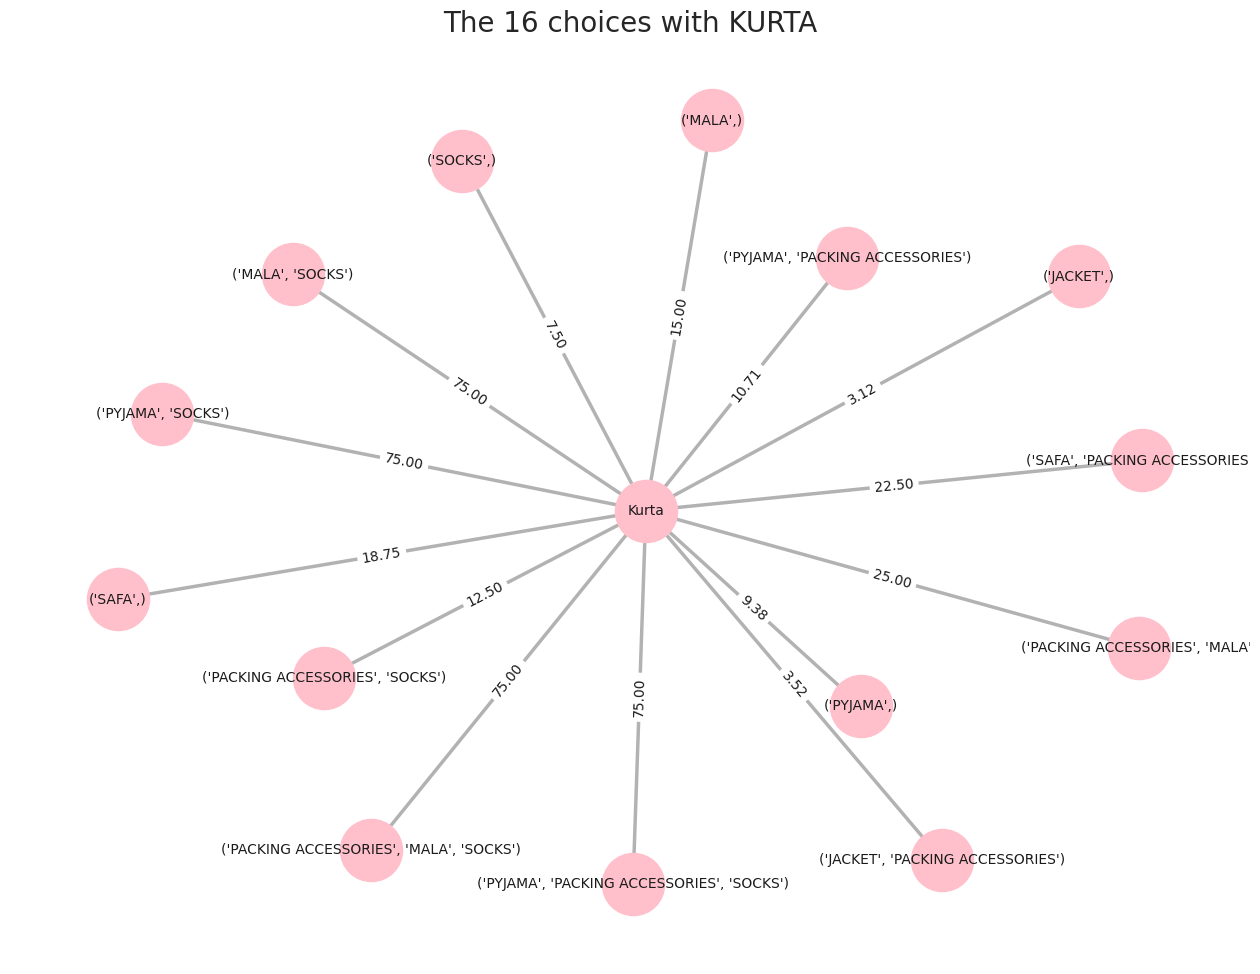

In [ ]:
kurta = nx.from_pandas_edgelist(kurta_df, source = 'Source', target = 'Destination')

edge_labels = {}
for _,i in kurta_df.iterrows() :
  edge_labels[(i['Source'], i['Destination'])] = i['Probability of sale']

plt.rcParams['figure.figsize'] = (16, 12)
pos = nx.spring_layout(kurta)
nx.draw_networkx_nodes(kurta, pos, node_size = 2000, node_color = 'pink')
nx.draw_networkx_edges(kurta, pos, width = 2.5, alpha = 0.6, edge_color = 'grey')
nx.draw_networkx_edge_labels(kurta, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(kurta, pos, font_size = 10, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('The 16 choices with KURTA', fontsize = 20)
plt.show()


### temp section ###

In [ ]:
df_temp = df.copy()
df_temp = df_temp[df_temp['BOTTOMWEAR'] == True]
df_temp.head()

,SALEDATE,BILLNO,CUSTOMERNAME,SALESPERSON,CAT2,CAT4,DEPARTMENT,SALEQTY,MONTH,WEEKNO,TOPWEAR,BOTTOMWEAR
9,2022-10-07,PM/00009,NIHAR JAIN,AZAD RAJPUT,302-CREAM,21 cm,SOCKS-09,1,October,2,False,True
18,2022-10-12,PM/00016,VIKRAM JEET,MUKESH CHATURVEDI,340-OFF WHITE,XL,PYJAMA SALE-09,1,October,3,False,True
72,2022-10-20,PM/00044,KARTIK JI,SUKHLAL PATEL,340-OFF WHITE,XL,PATIALA SALE-09,1,October,4,False,True
157,2022-10-29,PM/00085,VINAYAK SARWATE,AZAD RAJPUT,340-OFF WHITE,XL,PATIALA SALE-09,1,October,5,False,True
194,2022-11-14,PM/00099,SHUBHAM GAUTAM,SUKHLAL PATEL,303-BISCUIT,09 NO.,JOOTI-09,1,November,8,False,True


In [ ]:
# lst = ['XL', 'M', 'S', 'L', 'XXL']
# df_ = df_temp[df_temp['CAT4'].isin(lst)]
sizes = df_temp.groupby('CAT4')['CAT4'].count()
plt.xticks(rotation = 90)

plt.ylabel('NO. OF ITEMS')
plt.title("SIZES")
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r", len(sale_month))
rank = sale_month.argsort().argsort()
ax = sns.barplot(x=sizes.index, y=sizes.values, palette=np.array(pal[::-1])[rank])
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
salesmen = df['SALESPERSON' ].unique()
df_ar = df[df['SALESPERSON'] == "AZAD RAJPUT"]
df_ar.head()

In [ ]:
sns.kdeplot(x=df['SALEDATE'])
plt.xticks(rotation = 90)


In [ ]:
df_ = df.copy(deep=True)
df_.drop(['SALEDATE', 'BILLNO', 'CUSTOMERNAME', 'CAT2', 'CAT4',
       'DEPARTMENT', 'MONTH',  'TOPWEAR', 'BOTTOMWEAR'], axis=1, inplace=True)
var = df_.groupby(['WEEKNO','SALESPERSON']).count()
var['PROP'] = var/var.sum(level=0)
var.sum(level=1)
# var[1,'AZAD RAJPUT']

In [ ]:
var = df_.groupby(['WEEKNO','SALESPERSON']).count()
def prop(group):
    return group / group.sum()
result = var.groupby(level=0)['SALEQTY'].transform(prop)
# plt.plot(result)
result = result.unstack()
result = result.fillna(0)
result = result * 100
result.head()

SALESPERSON,AZAD RAJPUT,MUKESH CHATURVEDI,SANDEEP AGARWAL,SUKHLAL PATEL,SUNIL RAVIDAS
WEEKNO,,,,,
1,33.333333,33.333333,0.000000,0.000000,33.333333
2,33.333333,0.000000,33.333333,33.333333,0.000000
3,20.000000,20.000000,20.000000,20.000000,20.000000
4,33.333333,0.000000,0.000000,33.333333,33.333333
5,25.000000,0.000000,25.000000,25.000000,25.000000


In [ ]:
result.std(axis=0)

SALESPERSON
AZAD RAJPUT          10.188519
MUKESH CHATURVEDI    10.921910
SANDEEP AGARWAL      12.878470
SUKHLAL PATEL        11.918282
SUNIL RAVIDAS        13.246697
dtype: float64

In [ ]:
from scipy.stats import t
org = df.copy(deep=True)
org = org[org['TOPWEAR'] == True]
df_ = org.groupby(['WEEKNO']).count()
in_season = df_['SALEDATE']
n = len(in_season)
mean = np.mean(in_season)
std_dev = np.std(in_season, ddof=1)

# Degrees of freedom
dof = n - 1

# Confidence level
conf_level = 0.90

# Calculate the t-value
t_value = t.ppf((1 + conf_level) / 2, dof)

# Calculate the confidence interval
lower = mean - t_value * std_dev / np.sqrt(n)
upper = mean + t_value * std_dev / np.sqrt(n)

# Print the results
print("Sample Mean:", mean)
print("Std deviation:", std_dev)
print("T value:",t_value )
print("Confidence Interval:", (lower, upper))

Sample Mean: 11.909090909090908
Std deviation: 11.59601364553925
T value: 1.7207429028118775
Confidence Interval: (7.654935370814594, 16.16324644736722)


## DECISION TREES ##

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
# data = pd.read_csv('sales_data.csv')
dfd = df.copy(deep=True)
# Split the data into training and testing sets
dfd.drop(['SALEDATE', 'BILLNO', 'CUSTOMERNAME', 'CAT2', 'CAT4',
       'DEPARTMENT', 'MONTH'], axis=1, inplace=True)
dfd.head()

,SALESPERSON,SALEQTY,WEEKNO,TOPWEAR,BOTTOMWEAR
0,SUNIL RAVIDAS,1,1,True,False
1,AZAD RAJPUT,1,1,True,False
2,AZAD RAJPUT,1,1,True,False
3,AZAD RAJPUT,1,1,True,False
4,AZAD RAJPUT,1,1,True,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfd.drop('SALESPERSON', axis=1), dfd['SALESPERSON'], test_size=0.48)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.41702127659574467


In [ ]:
clf.predict(np.array([1, 4, True, False]).reshape(1,-1))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['AZAD RAJPUT'], dtype=object)